In [16]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()
import numpy as np
import sqlalchemy
%load_ext sql
engine=sqlalchemy.create_engine("postgresql://millbr02:@localhost/movies")

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [17]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [18]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [19]:
#release_dates = pd.DataFrame.from_csv('data/release_dates.csv', index_col=None,
#                                      parse_dates=['date'], infer_datetime_format=True)
release_date=pd.read_sql("release_date", engine)
release_date.head()

,title,year,country,date,month,day,dow
0,Meteor,1979,Japan,1979-10-27,10,27,5
1,Meteor,1979,Norway,1979-11-27,11,27,1
2,Meteor,1979,Spain,1979-12-01,12,1,5
3,Meteor,1979,Australia,1979-12-20,12,20,3
4,Meteor,1979,Finland,1979-12-21,12,21,4


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

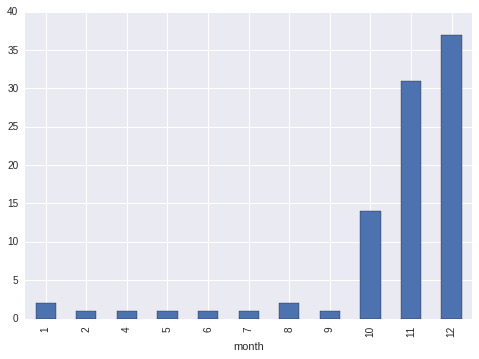

In [30]:
release_date[(release_date.title.str.contains("Christmas")) &(release_date.country == "USA")].groupby('month').size().plot(kind='bar')

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

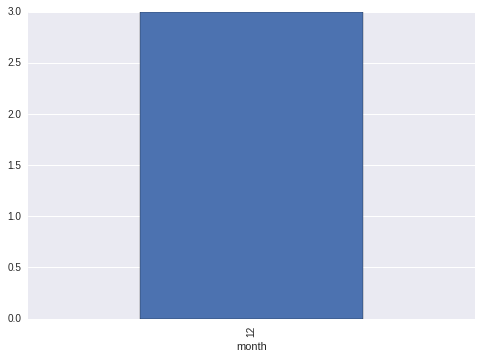

In [32]:
release_date[(release_date.title.str.startswith("The Hobbit")) & (release_date.country == "USA")].groupby("month").size().plot(kind="bar")

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

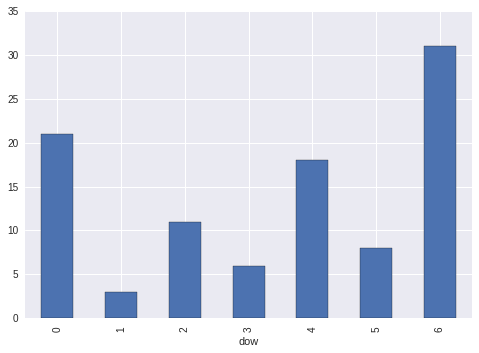

In [35]:
release_date[(release_date.title.str.contains("Romance")) & (release_date.country=="USA")].groupby("dow").size().plot(kind="bar")

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

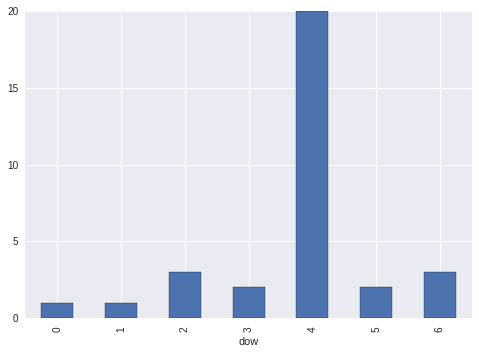

In [39]:
release_date[(release_date.title.str.contains("Action")) & (release_date.country == "USA")].groupby("dow").size().plot(kind="bar")

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [66]:
jdMovies = cast[(cast.name == "Judi Dench") & (cast.year >= 1990) & (cast.year < 2000)]
jdMovies = pd.merge(jdMovies, release_date, right_on="title", left_on="title")
jdMovies = jdMovies[jdMovies.country=="USA"]
jdMovies[["title","date"]]

,title,date
1,GoldenEye,1995-11-17
40,Hamlet,1910-02-02
43,Hamlet,1911-04-15
47,Hamlet,1921-11-08
63,Hamlet,1991-01-18
79,Hamlet,1996-12-25
100,Hamlet,2000-06-23
114,Hamlet,2014-01-10
125,Jack & Sarah,1996-03-22
130,Mrs Brown,1997-07-18


### In which months do films with Judi Dench tend to be released in the USA?

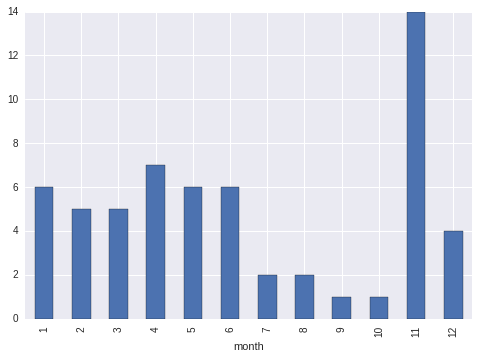

In [71]:
jdMonths = cast[(cast.name == "Judi Dench")]
jdMonths = pd.merge(jdMonths, release_date, right_on="title", left_on="title")
jdMonths = jdMonths[jdMonths.country=="USA"]
jdMonths.groupby("month").size().plot(kind="bar")

### In which months do films with Tom Cruise tend to be released in the USA?

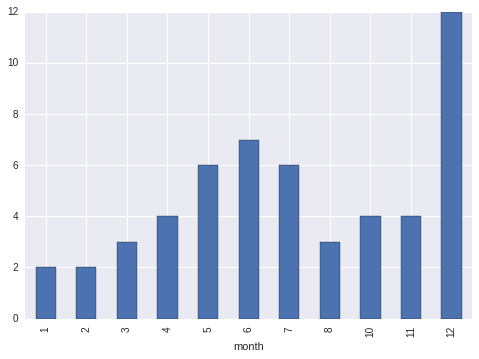

In [75]:
tc = cast[(cast.name == "Tom Cruise")]
tc = pd.merge(tc, release_date, right_on="title", left_on="title")
tc = tc[tc.country=="USA"]
tc.groupby("month").size().plot(kind="bar")